# Sentiment Analysis Preprocessing Step

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Splitting and *Saving*

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Through Vader module, we will divide our dataset in two types : Negative and Positive
#By sentiment analysis scores from user reivews and rating.
#The Vader module, need to be downloaded
nltk.download('vader_lexicon')

text_reviews = pd.read_csv('/content/drive/MyDrive/Team#2_LDA/tripadvisor_hotel_reviews.csv')
text_reviews.head(10)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [ ]:
#Drop NaN values for better result.
text_reviews.dropna()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
19596,"best kept secret 3rd time staying charm, not 5...",5
19597,great location price view hotel great quick pl...,4
19598,"ok just looks nice modern outside, desk staff ...",2
19599,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
#Bring sentiment scoring model to build our own data set.
Sentiment_analysis = SentimentIntensityAnalyzer()

#Each sentiment dataset to be separated.
pos_reviews = pd.DataFrame(columns = ['review'])
neg_reviews = pd.DataFrame(columns = ['review'])
idx_pos = 0
idx_neg = 0

#Function will return scores from by sentiment analysis as, 1 = Positive, 0.5 = Neutral, 0 = Negative
def scoring_unit(review):
  analyzed_scores = Sentiment_analysis.polarity_scores(review)
  scoring = 0.5

  if analyzed_scores['compound'] >= 0.7:
    scoring = 1
  elif analyzed_scores['compound'] < 0:
    scoring = 0

  return scoring

#Save the reviews with the score data and ratings from Users
for idx, row in text_reviews.iterrows():
  
  # Break it, since we don't want to read false datas.
  if idx == len(text_reviews['Review']):
    break
  
  temp_score = scoring_unit(row['Review'])

  if temp_score == 1 and row['Rating'] >= 4:
    pos_reviews.at[idx_pos, 'review'] = row['Review']
    idx_pos += 1
  elif temp_score == 0 and row['Rating'] <= 2:
    neg_reviews.at[idx_neg, 'review'] = row['Review']
    idx_neg += 1

In [ ]:
pos_reviews.head(10)

,review
0,nice hotel expensive parking got good deal sta...
1,"unique, great stay, wonderful time hotel monac..."
2,"great stay great stay, went seahawk game aweso..."
3,love monaco staff husband stayed hotel crazy w...
4,"cozy stay rainy city, husband spent 7 nights m..."
5,"excellent staff, housekeeping quality hotel ch..."
6,"hotel stayed hotel monaco cruise, rooms genero..."
7,excellent stayed hotel monaco past w/e delight...
8,nice value seattle stayed 4 nights late 2007. ...
9,nice hotel good location hotel kimpton design ...


In [ ]:
neg_reviews.head(10)

,review
0,"bad choice, booked hotel hot wire called immed..."
1,warwick bad good reviews warwick shocks staff ...
2,"austin powers decor familiar, hotel seattlewhe..."
3,"hated inn terrible, room-service horrible staf..."
4,disappointed arranging anticipated girl weeken...
5,"stay clear, internet reservation friday rang h..."
6,single rooms like hospital rooms single rooms ...
7,seattle crown plaza not worth money got late h...
8,worst hotel experience booked nonsmoking room ...
9,old dumpy place problems head starts spinning ...


In [ ]:
# 이 뒤로 바로 코딩 하실거면 이 셀은 실행시키지 않으셔도 좋습니다.
#Save our processed reviews for further use.
pos_reviews.to_csv("/content/drive/MyDrive/Team#2_LDA/pos_review.csv")
neg_reviews.to_csv("/content/drive/MyDrive/Team#2_LDA/neg_review.csv")

In [ ]:
# 이 뒤로 바로 코딩 하실거면 이 셀은 실행시키지 않으셔도 좋습니다.
#Free all memories.
del [[text_reviews, pos_reviews, neg_reviews]]

## Data Exploration

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

pos_review = pd.read_csv('/content/drive/MyDrive/Team#2_LDA/pos_review.csv')
neg_review = pd.read_csv('/content/drive/MyDrive/Team#2_LDA/neg_review.csv')

#### Data Sentiment Rate Display

<function matplotlib.pyplot.show>

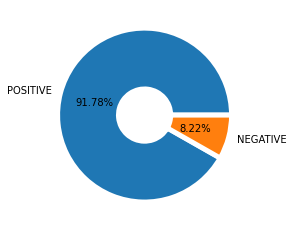

In [ ]:
#Lets see the ratio of POS/ NEG in our dataset

total_attribute = len(pos_review) + len(neg_review)
pos_rate = len(pos_review) / total_attribute * 100
neg_rate = 100 - pos_rate

ratio = [pos_rate, neg_rate]
labels = ['POSITIVE', 'NEGATIVE']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels= labels, autopct = '%.2f%%', wedgeprops=wedgeprops)
plt.show

#### Data Word-Cloud Display with both sentiments

In [3]:
import nltk
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet 
from wordcloud import WordCloud

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
# Wordnet provides the part of speech on each words. 
def pos_wordnet(pos_tag):

  if pos_tag.startswith('J'):
    return wordnet.ADJ 

  elif pos_tag.startswith('V'):
    return wordnet.VERB 

  elif pos_tag.startswith('N'):
    return wordnet.NOUN

  elif pos_tag.startswith('R'):
    return wordnet.ADV
    
  else:
    return wordnet.NOUN

In [5]:
def lemmatized_tokens(text):
  
  #Made all words in lower cases for detections.
  text = text.lower() 

  #This be the point of shifts in each word to word : 공백문자를 넘겨주어 구분하는데 사용할 것 입니다.
  pattern = r'\b[a-zA-Z]{3,}\b' 

  tokens = nltk.regexp_tokenize(text, pattern) # Tokenize the followed text. { Word }
  tagged_tokens = nltk.pos_tag(tokens)  # Returns a list of tuple consist with (Word, pos_tag)
  
  stopwords_ = stopwords.words('english')

  #Customized extra stop_words : Which is the list of words we don't want to take weights on.
  #This is made because we want to specify which point customers felt good/bad with the provided service from hotel.
  #For example, in reviews of course we will get the word "hotel" the most frequently, so it has to be removed.
  add_stopwords = ["hotel","everything","anything","nothing","thing","need",
                   "good","great","excellent","perfect","much","even","really",
                   "bad", "stay", "nice", "best", "fantastic", "say", "go", "day", 
                   "night", "time"] 
                  
  stopwords_.extend(add_stopwords)
  stopwords_ = set(stopwords_)

  # get lemmatized tokens
  wordnet_ = WordNetLemmatizer()                             
  # call function "get_wordnet_pos"
  lemmatized_words=[wordnet_.lemmatize(word, pos_wordnet(tag))

  for (word, tag) in tagged_tokens \
  if word not in stopwords_ and \
  # remove punctuations
  word not in string.punctuation]

  return lemmatized_words

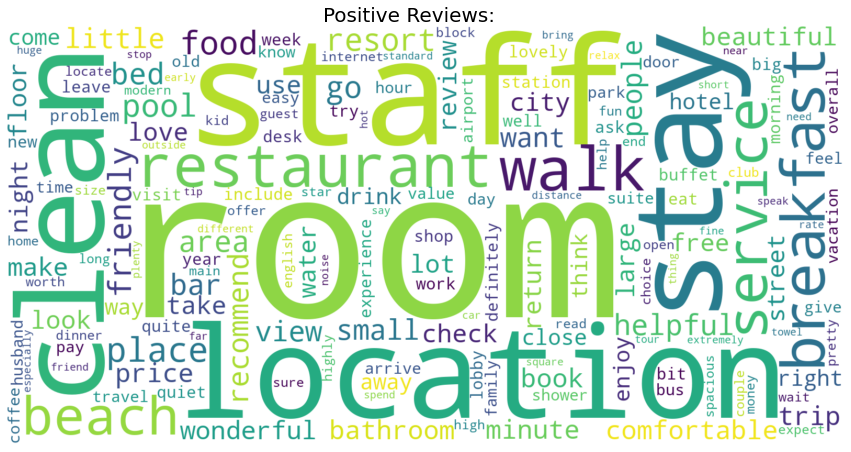

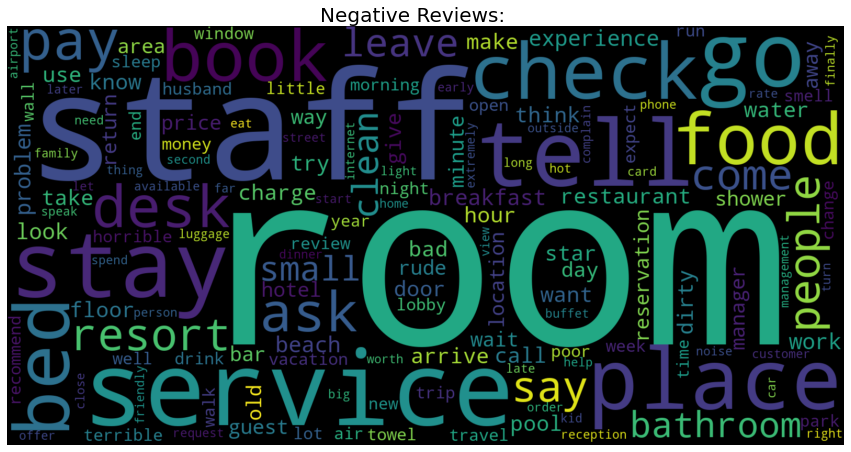

In [6]:
def wordcloud(review_data, review_columns, color, title):

  words = review_data[review_columns].tolist()
  words_str = ' '.join(lemmatized_tokens(' '.join(words))) #call function "lemmatized_tokens"
  wordcloud = WordCloud(collocations = False, background_color = color, width=1600,
                        height=800, margin=2, min_font_size=20).generate(words_str)

  plt.figure(figsize = (15, 10))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.figtext(.5,.8,title,fontsize = 20, ha= 'center')
  plt.show()     
    
# Wordcoulds for Positive Reviews
wordcloud(pos_review,'review', 'white','Positive Reviews: ')

# WordCoulds for Negative Reviews
wordcloud(neg_review,'review', 'black', 'Negative Reviews:')